# 군집분석

## 환경설정

In [3]:
import pandas as pd

from matplotlib import font_manager, rc
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


In [22]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

## data

In [26]:
data = pd.read_csv('C:/Users/User/Documents/공빅데/플젝데이터/2_수도권_회귀_데이터_최종.csv')
data2 = pd.read_csv('C:/Users/User/Documents/공빅데/플젝데이터/2_서울_회귀_예측.csv')
data.head()

,SIG_CD,도시,자치구,N1인_가구수,N2인이상_가구,PC방_총종사자수,const,가구원_모두_65세이상_가구수,고혈압소계,노래연습장업수,...,유출유입평균,유흥주점영업수,음식점_종사자수,의원수,전화권유업체수,종교단체총종사자수,진해거담제_청구건수평균,집단시설_가구원수,총가구_가구원_계,확진자수
0,11110,서울특별시,종로구,24671,37981,0.140673,1.0,8079,0.514296,70,...,348354.00,54,16.422639,56.000000,20.000000,1.313166,9.663868,3.545225,154969,84
1,11140,서울특별시,중구,22078,32418,0.090870,1.0,6990,0.543690,110,...,387669.50,359,18.722940,176.000000,71.000000,0.730011,18.501646,2.304573,130957,55
2,11170,서울특별시,용산구,35148,58029,0.055462,1.0,11019,0.489478,83,...,230206.00,31,7.777499,90.000000,30.000000,0.568269,20.696801,1.239100,227181,113
3,11200,서울특별시,성동구,41488,81282,0.079416,1.0,12806,0.543565,190,...,250183.75,37,3.998492,147.000000,38.000000,0.216892,19.779371,1.212928,299688,110
4,11215,서울특별시,광진구,58714,91191,0.102567,1.0,14132,0.575652,338,...,243778.00,16,4.256934,0.047531,0.004447,899.000000,15.146901,1.778100,359766,121


## 정규화

In [28]:
ss = StandardScaler()
df_scale = ss.fit_transform(data[['N1인_가구수','가구원_모두_65세이상_가구수','병원_병상수','병원_의료인수','유흥주점영업수']])
df_scale = pd.DataFrame(df_scale)
df_scale.columns = [['N1인_가구수','가구원_모두_65세이상_가구수','병원_병상수','병원_의료인수','유흥주점영업수']]

In [36]:
df_seoul = df_scale.iloc[:25,:]

## KMeans

In [40]:
df_seoul.head()

,N1인_가구수,가구원_모두_65세이상_가구수,병원_병상수,병원_의료인수,유흥주점영업수
0,-0.627366,-0.913460,0.207114,2.040004,-0.516447
1,-0.754035,-1.086548,-1.030646,-0.120702,2.320689
2,-0.115559,-0.446171,-1.087395,-0.324601,-0.730395
3,0.194153,-0.162141,0.084157,-0.105017,-0.674582
4,1.035652,0.048616,-0.190760,0.113312,-0.869926


In [164]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=999)
    kmeanModel.fit(df_seoul)
    distortions.append(kmeanModel.inertia_)

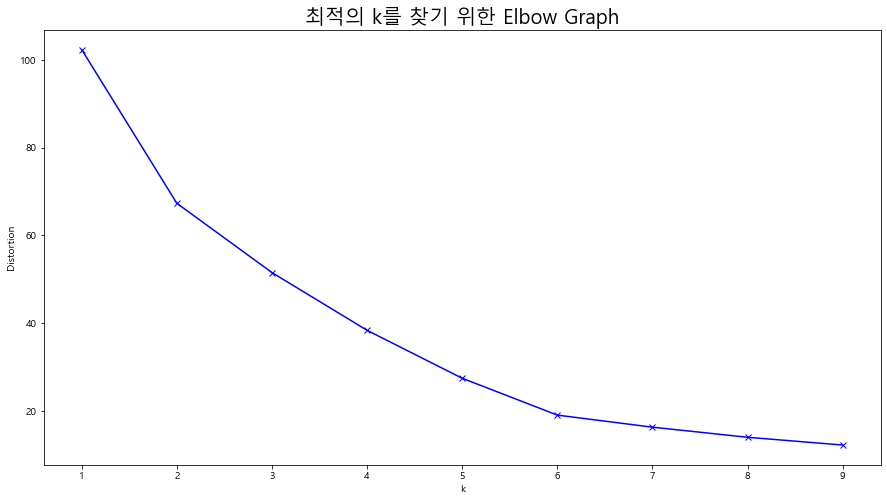

In [165]:
plt.figure(figsize=(15,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('최적의 k를 찾기 위한 Elbow Graph',fontsize=20)
plt.show()

### 군집수 6개

In [172]:
kms = KMeans(n_clusters=6).fit(df_seoul)

In [173]:
res = pd.concat([data.iloc[:,:3],pd.DataFrame({'label':kms.labels_})],axis=1)
res = res.fillna(99)
res.iloc[:25,]
#res

,SIG_CD,도시,자치구,label
0,11110,서울특별시,종로구,1.0
1,11140,서울특별시,중구,5.0
2,11170,서울특별시,용산구,4.0
3,11200,서울특별시,성동구,4.0
4,11215,서울특별시,광진구,4.0
5,11230,서울특별시,동대문구,0.0
6,11260,서울특별시,중랑구,0.0
7,11290,서울특별시,성북구,0.0
8,11305,서울특별시,강북구,4.0
9,11320,서울특별시,도봉구,4.0


## T-SNE 시각화

In [174]:
model = TSNE(learning_rate=100, random_state=1234)

transformed = model.fit_transform(df_scale)

xs = transformed[:,0]
ys = transformed[:,1]

In [175]:
fin = pd.concat([res,pd.DataFrame(xs),pd.DataFrame(ys)],axis=1)
fin.columns = ['SIG_CD','도시','자치구','label','x_data','y_data']
fin

,SIG_CD,도시,자치구,label,x_data,y_data
0,11110,서울특별시,종로구,1.0,1.814312,-0.255353
1,11140,서울특별시,중구,5.0,-2.206369,-0.103054
2,11170,서울특별시,용산구,4.0,-0.861563,4.081279
3,11200,서울특별시,성동구,4.0,1.126750,2.333484
4,11215,서울특별시,광진구,4.0,2.108696,2.535863
...,...,...,...,...,...,...
72,41650,포천시,포천시,99.0,-2.749492,2.285210
73,41670,여주시,여주시,99.0,-2.974737,3.704091
74,41800,연천군,연천군,99.0,-4.167511,3.740552
75,41820,가평군,가평군,99.0,-3.750604,3.520264


In [176]:
fin_seoul = fin[fin.도시=='서울특별시']

### 그래프

<ipython-input-181-b417510071ab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_seoul['col'] = col


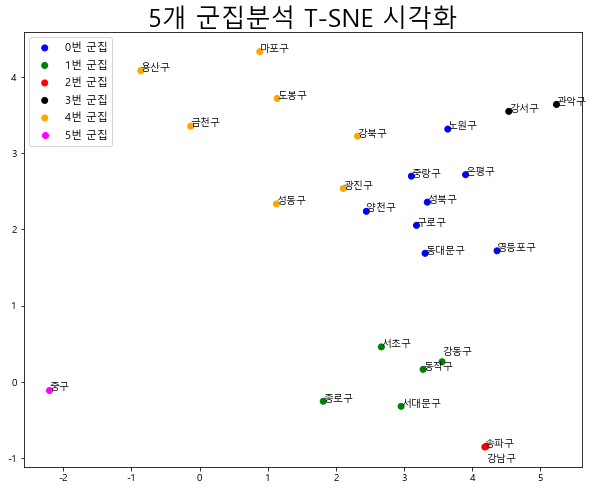

In [181]:

plt.figure(figsize=(10,8))

col=[]
for i in range(len(fin_seoul)):
    if fin_seoul.loc[i,'label'] == 0:
        col.append('blue') 
    elif fin_seoul.loc[i,'label'] == 1:
        col.append('green') 
    elif fin_seoul.loc[i,'label'] == 2:
        col.append('red') 
    elif fin_seoul.loc[i,'label'] == 3:
        col.append('black') 
    elif fin_seoul.loc[i,'label'] == 4:
        col.append('orange')         
    else:
        col.append('magenta')
fin_seoul['col'] = col


# Scatter plot with a different color by groups

groups = fin_seoul.groupby('label')

for name, group in groups:
    plt.scatter(group.x_data, group.y_data, label=name, c=group.col)

       

for i in range(len(fin_seoul)):
    if fin_seoul.loc[i,'자치구']=='강남구':
        plt.text(fin.x_data[i],fin.y_data[i]-0.2,fin.자치구[i], fontsize=10)
    elif fin_seoul.loc[i,'자치구']=='강동구':
        plt.text(fin.x_data[i],fin.y_data[i]+0.1,fin.자치구[i], fontsize=10)
    else:
        plt.text(fin.x_data[i],fin.y_data[i],fin.자치구[i], fontsize=10)

    
plt.legend(['0번 군집','1번 군집','2번 군집','3번 군집','4번 군집','5번 군집'],fontsize=11, loc='upper left') # legend position



plt.title('5개 군집분석 T-SNE 시각화', fontsize=25)


plt.show()

